In [1]:
import matplotlib
matplotlib.use("Agg")
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
import os
import shutil


In [2]:
CONVERTED_DATABASE_NAME = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/converted-databases/exp-dwm-test-run-190719_Hela_Ecoli_1to1_01-converted.sqlite'
RT_LOWER = 200
RT_UPPER = 400

# frame types for PASEF mode
FRAME_TYPE_MS1 = 0
FRAME_TYPE_MS2 = 8


In [3]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frames_df = pd.read_sql_query("select frame_id,mz,scan,intensity,retention_time_secs from frames where frame_type == {} and retention_time_secs >= {} and retention_time_secs <= {} order by frame_id ASC, scan ASC, mz ASC".format(FRAME_TYPE_MS1, RT_LOWER, RT_UPPER), db_conn)
db_conn.close()

print("loaded {} points from {}".format(len(frames_df), CONVERTED_DATABASE_NAME))


loaded 48935473 points from /Users/darylwilding-mcbride/Downloads/experiments/dwm-test/converted-databases/exp-dwm-test-run-190719_Hela_Ecoli_1to1_01-converted.sqlite


In [6]:
frames_df[frames_df.frame_id <= 1979].frame_id.unique()

array([1889, 1894, 1899, 1904, 1909, 1914, 1919, 1924, 1929, 1934, 1939,
       1944, 1949, 1954, 1959, 1964, 1969, 1974, 1979])

In [18]:
%matplotlib notebook

In [19]:
feature_mz_range = (705.6307692307693, 708.6175824175824)
feature_scan_range = (705, 577)

In [20]:
default_mz_range = (200, 1800)
default_scan_range = (900, 0)

<IPython.core.display.Javascript object>


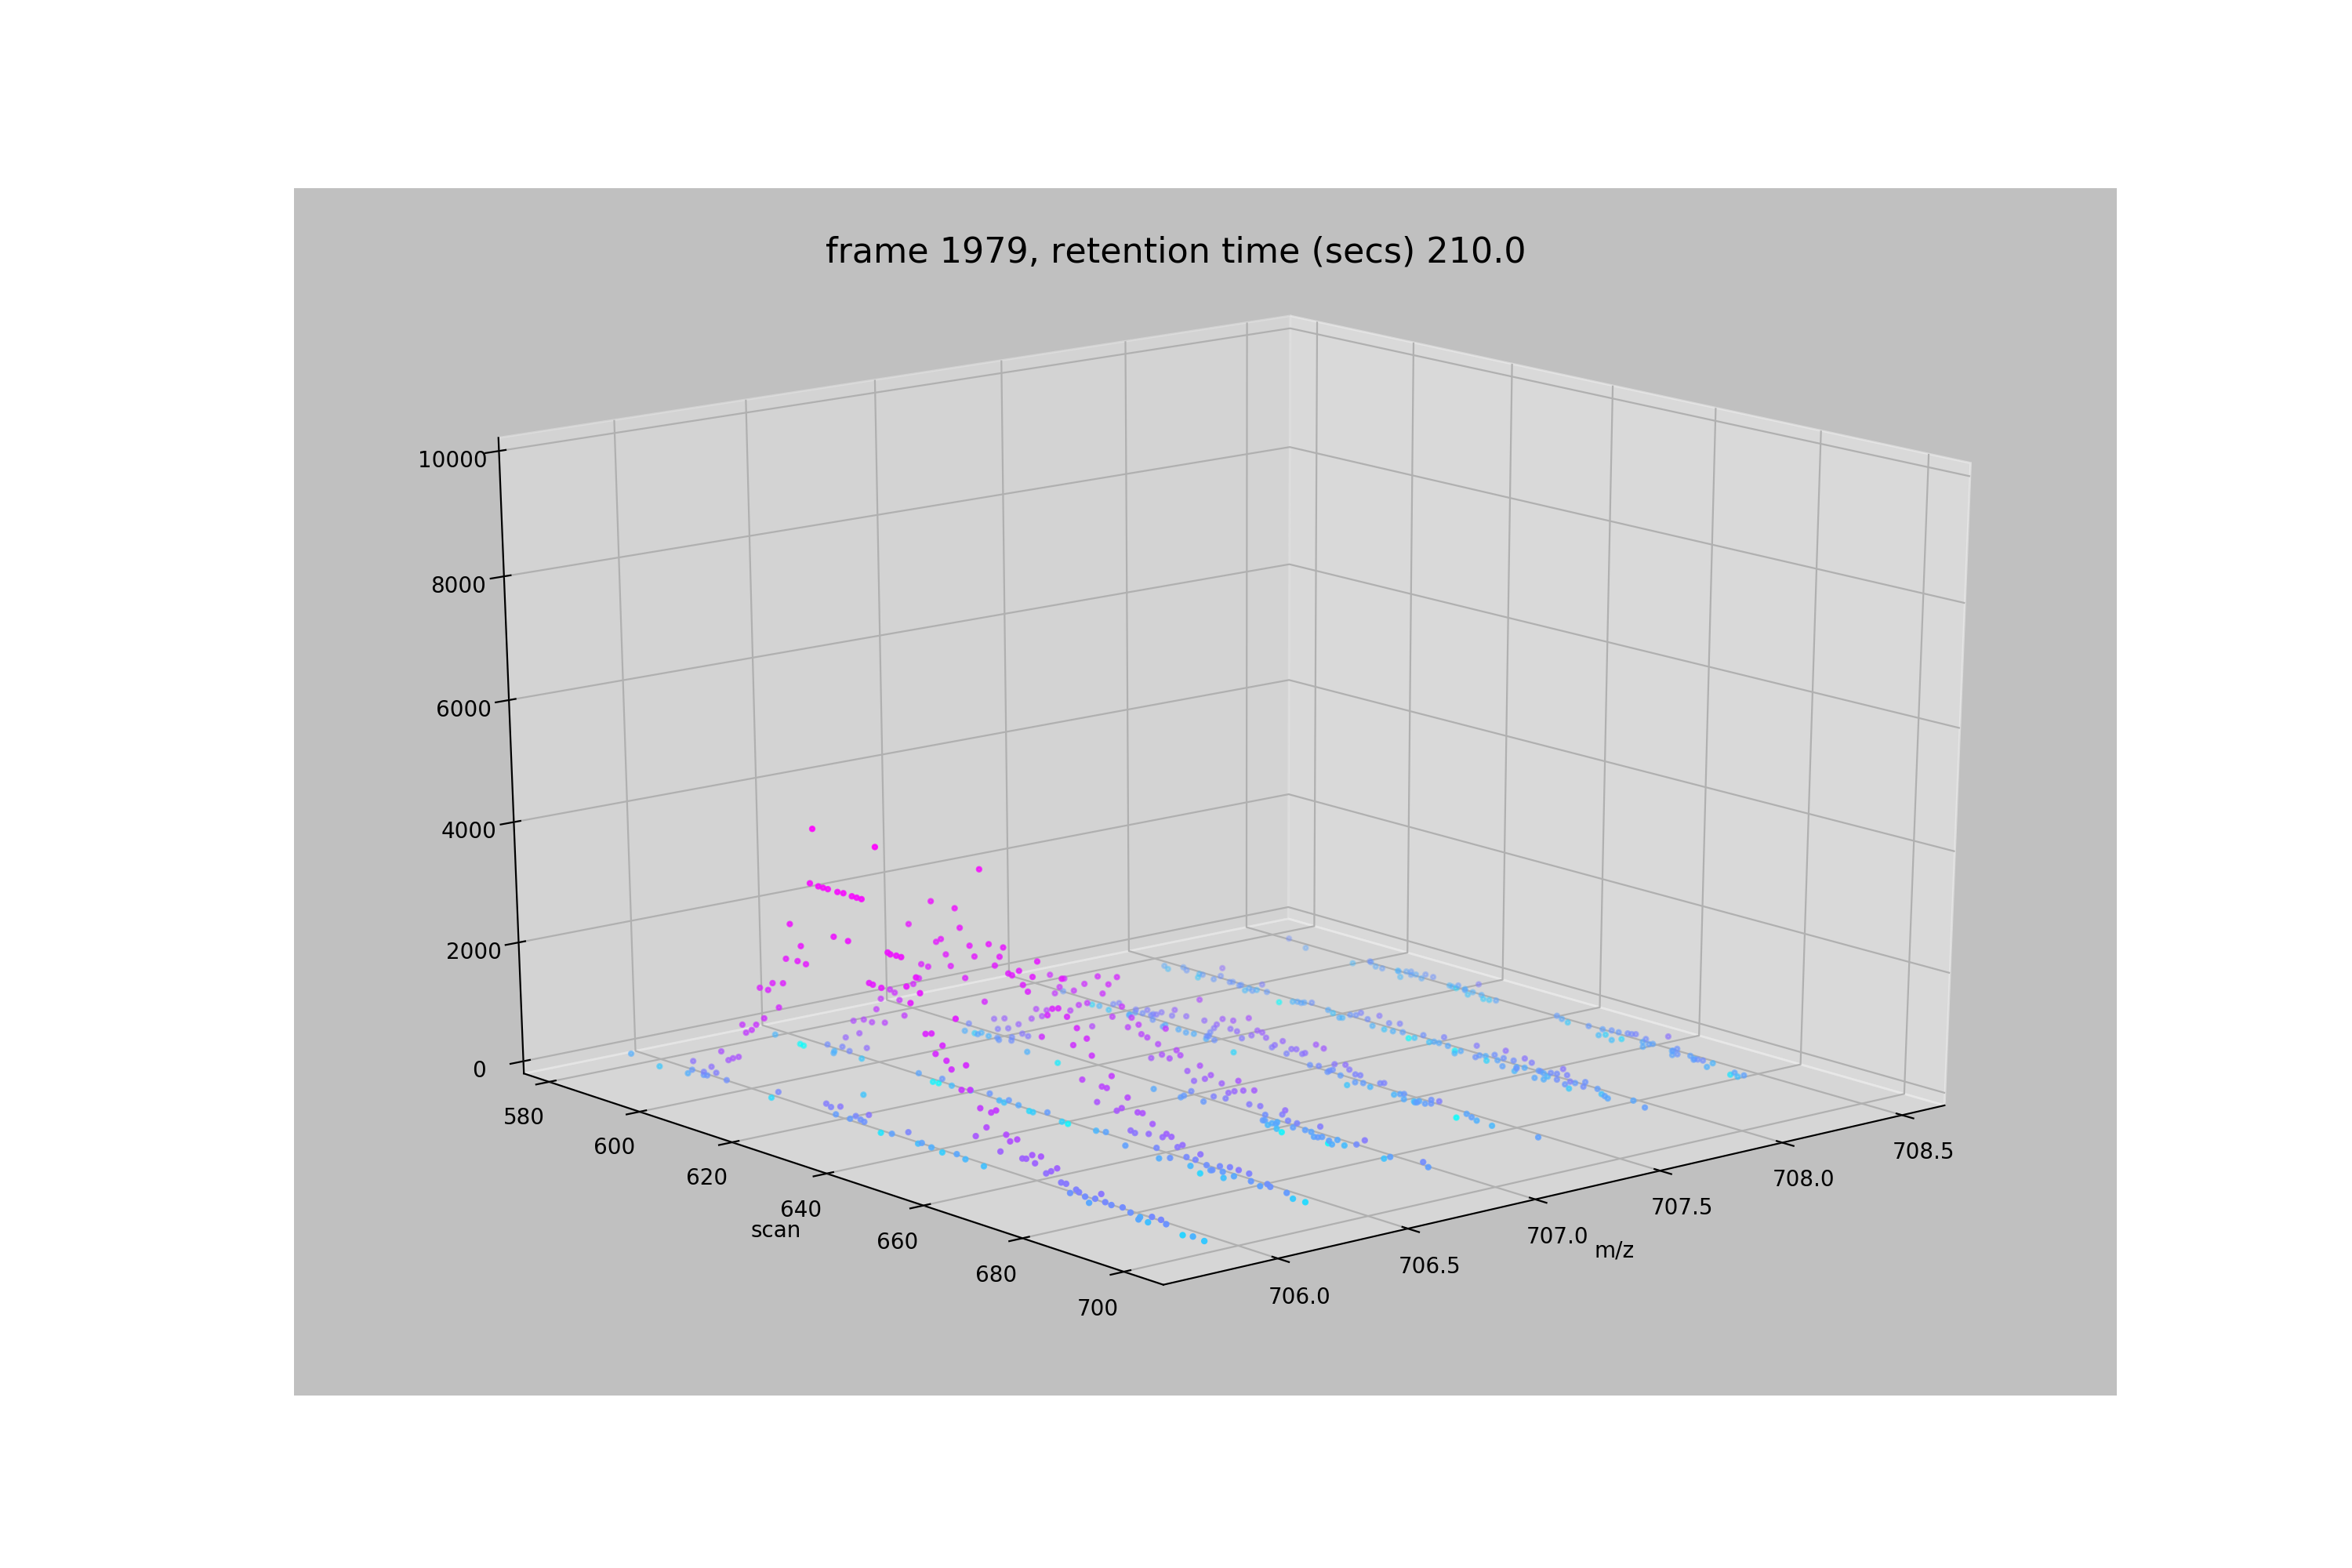

In [23]:
azimuth = 230
frame_counter = 0

frame_id = 1979
frame_df = frames_df[(frames_df.frame_id == frame_id) & (frames_df.mz >= feature_mz_range[0]) & (frames_df.mz <= feature_mz_range[1]) & (frames_df.scan >= feature_scan_range[1]) & (frames_df.scan <= feature_scan_range[0])]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_figheight(10)
fig.set_figwidth(15)
ax.patch.set_facecolor('silver')

ax.elev = 20.0
ax.azim = azimuth
ax.dist = 10.0

ax.set_xlim(left=feature_mz_range[0], right=feature_mz_range[1])
ax.set_ylim(bottom=feature_scan_range[0], top=feature_scan_range[1])
ax.set_zlim(bottom=0, top=10000)

plt.xlabel('m/z')
plt.ylabel('scan')

ax.scatter(frame_df.mz, frame_df.scan, frame_df.intensity, s=2**2, c=np.log(frame_df.intensity), cmap=plt.get_cmap('cool'))
fig.suptitle('frame {}, retention time (secs) {}'.format(frame_id, round(frame_df.iloc[0].retention_time_secs, 1)), fontsize=16, x=0.5, y=0.85)
plt.show()
